In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('../data/cleaned_retail_data.csv',parse_dates=["Date"])

In [3]:
# Data set overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nUnique values per column:\n", df.nunique())


Shape: (301290, 20)

Columns:
 Index(['City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Total_Purchases', 'Amount', 'Total_Amount',
       'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
       'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings',
       'products'],
      dtype='object')

Data types:
 City                        object
State                       object
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                objec

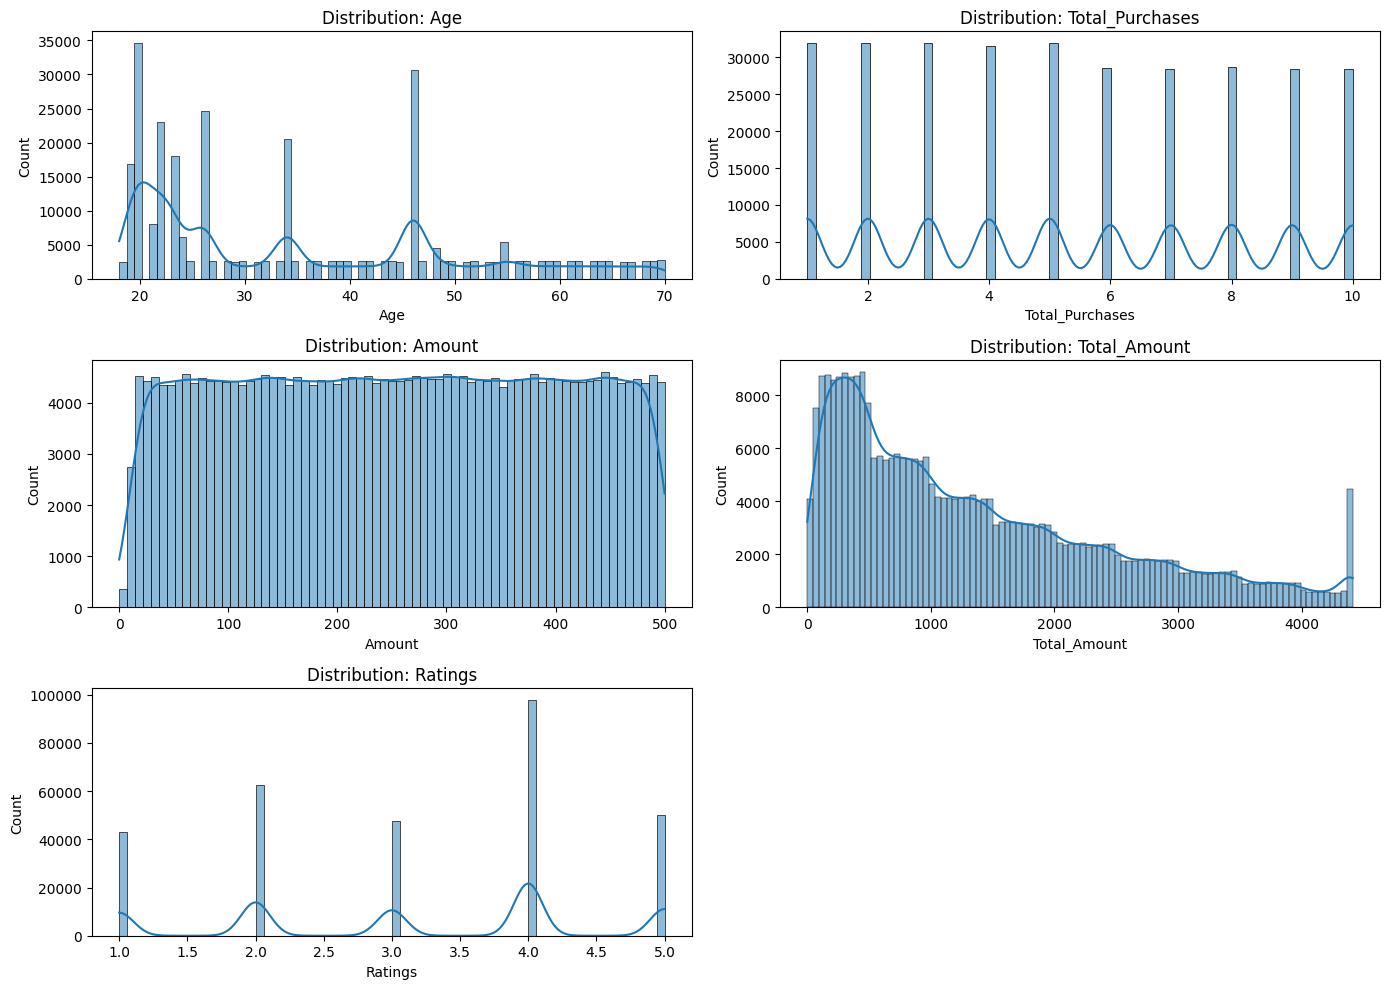

In [4]:
# numeric distribution
num_cols = ["Age","Total_Purchases","Amount","Total_Amount","Ratings"]

plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()

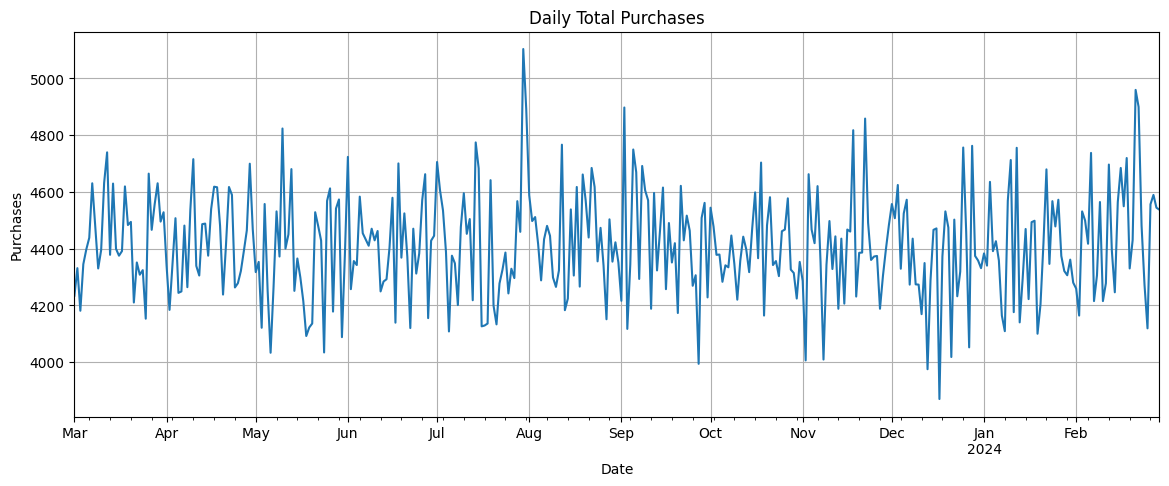

In [5]:
#Time series analysis
daily = df.groupby("Date")["Total_Purchases"].sum()

plt.figure(figsize=(14,5))
daily.plot()
plt.title("Daily Total Purchases")
plt.xlabel("Date")
plt.ylabel("Purchases")
plt.grid(True)
plt.show()


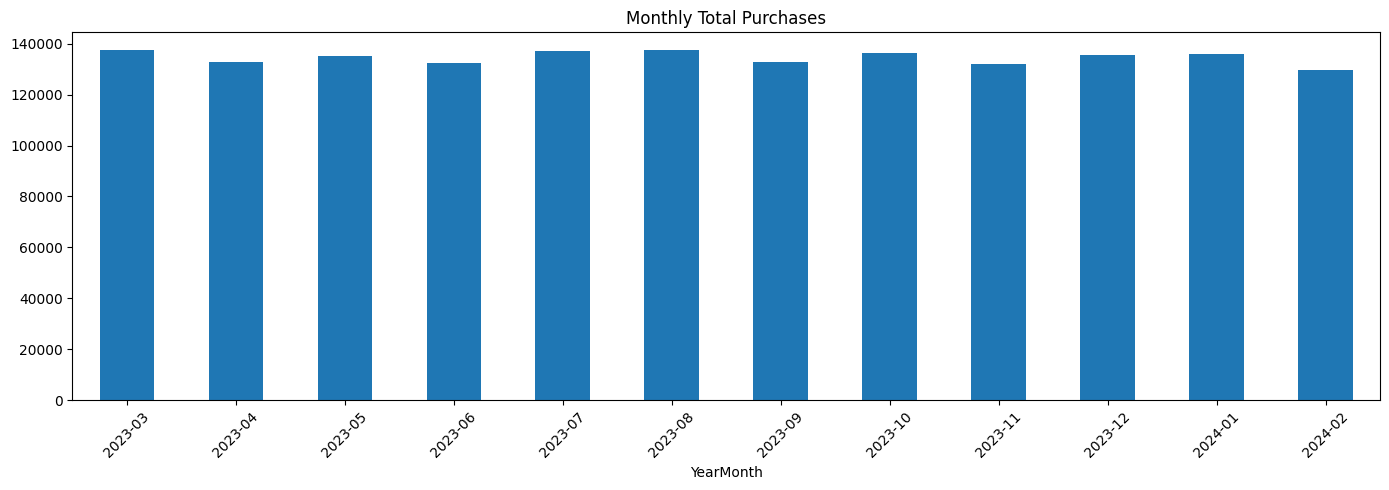

In [6]:
# Monthly trend
df["YearMonth"] = df["Date"].dt.to_period("M")
monthly = df.groupby("YearMonth")["Total_Purchases"].sum()

plt.figure(figsize=(14,5))
monthly.plot(kind="bar")
plt.title("Monthly Total Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


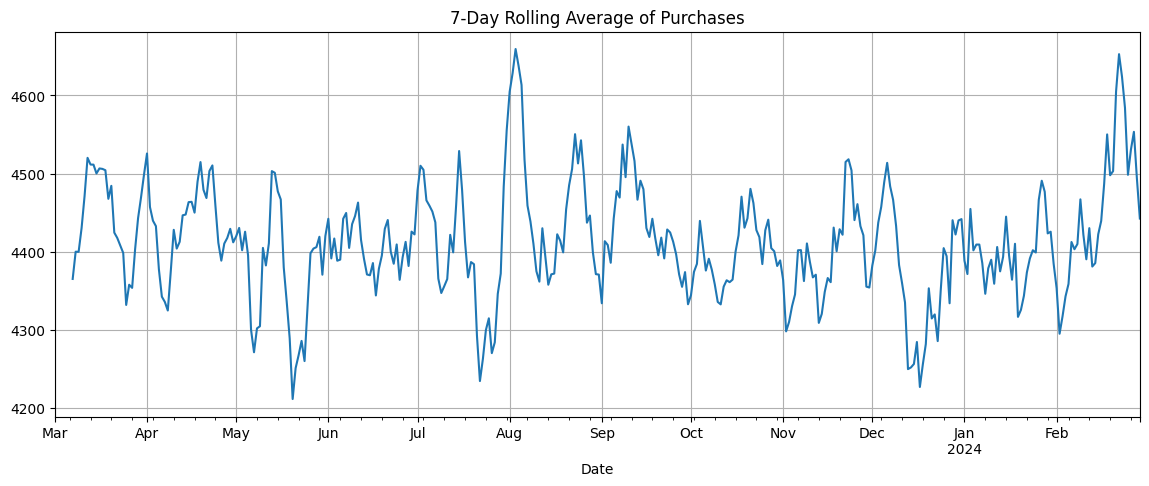

In [7]:
#Rolling Average (7-day)
plt.figure(figsize=(14,5))
daily.rolling(7).mean().plot()
plt.title("7-Day Rolling Average of Purchases")
plt.grid(True)
plt.show()


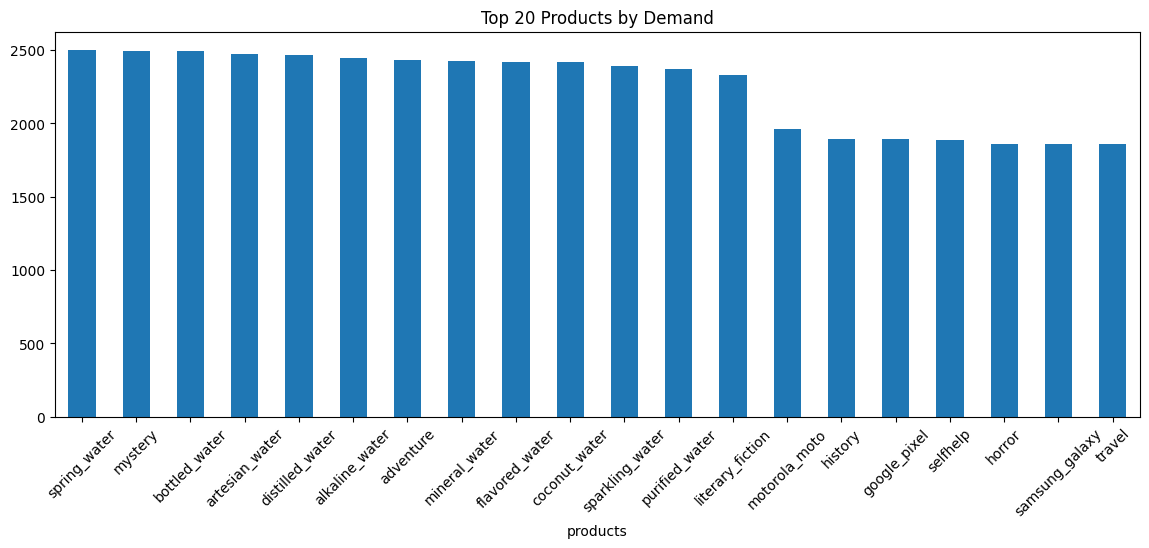

In [8]:
#Top 20 Products
df['products'].value_counts().head(20).plot(kind='bar', figsize=(14,5))
plt.title("Top 20 Products by Demand")
plt.xticks(rotation=45)
plt.show()


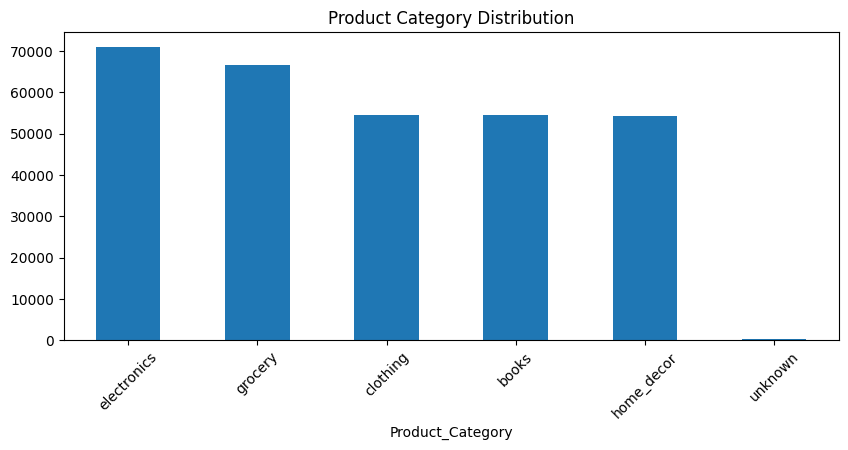

In [9]:
#Product Category Distribution
df['Product_Category'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()


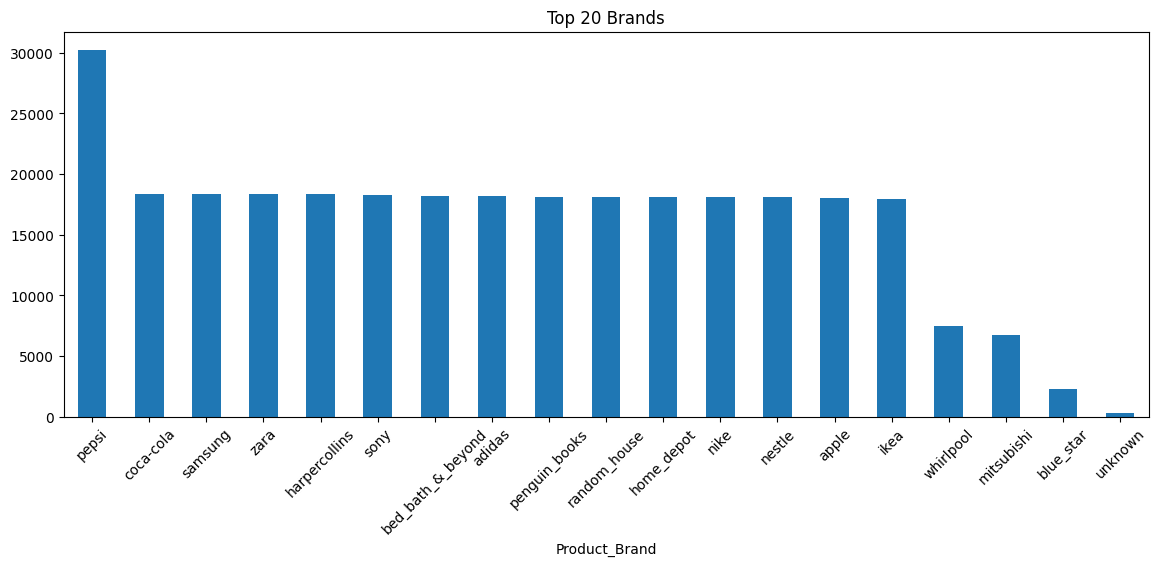

In [10]:
#Brand Distribution
df['Product_Brand'].value_counts().head(20).plot(kind='bar', figsize=(14,5))
plt.title("Top 20 Brands")
plt.xticks(rotation=45)
plt.show()


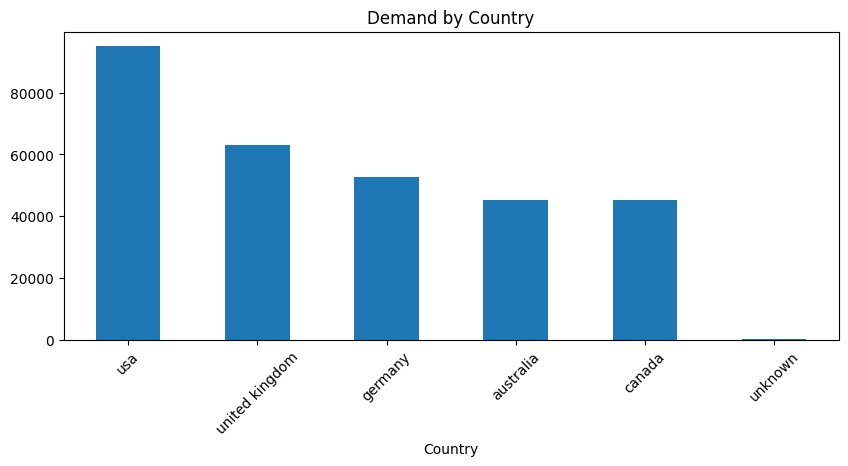

In [12]:
#Country
df['Country'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Demand by Country")
plt.xticks(rotation=45)
plt.show()


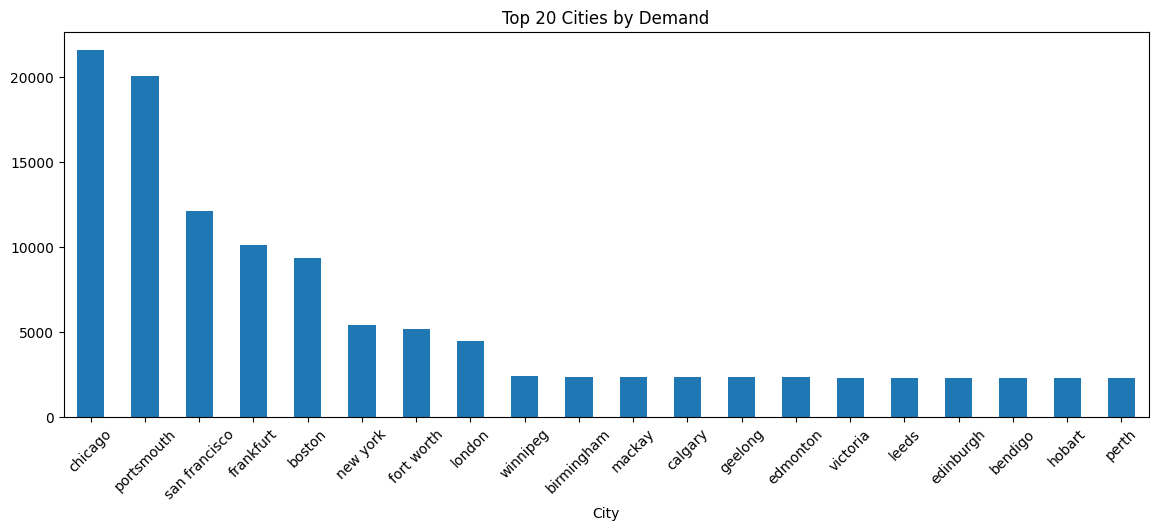

In [13]:
#City (Top 20)
df['City'].value_counts().head(20).plot(kind='bar', figsize=(14,5))
plt.title("Top 20 Cities by Demand")
plt.xticks(rotation=45)
plt.show()


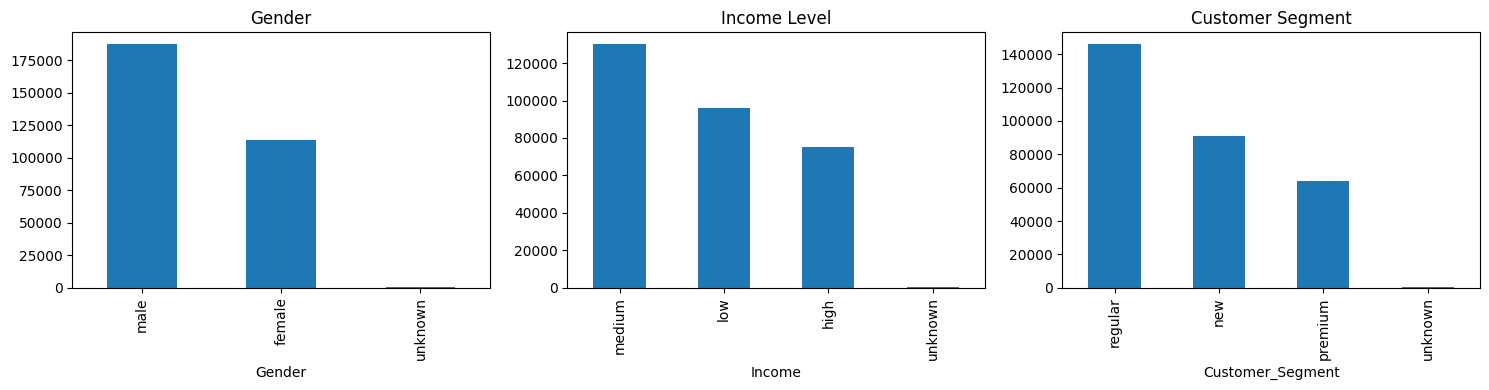

In [14]:
#Customer EDA
fig, axes = plt.subplots(1,3, figsize=(15,4))
df['Gender'].value_counts().plot(kind='bar', ax=axes[0], title="Gender")
df['Income'].value_counts().plot(kind='bar', ax=axes[1], title="Income Level")
df['Customer_Segment'].value_counts().plot(kind='bar', ax=axes[2], title="Customer Segment")
plt.tight_layout()
plt.show()


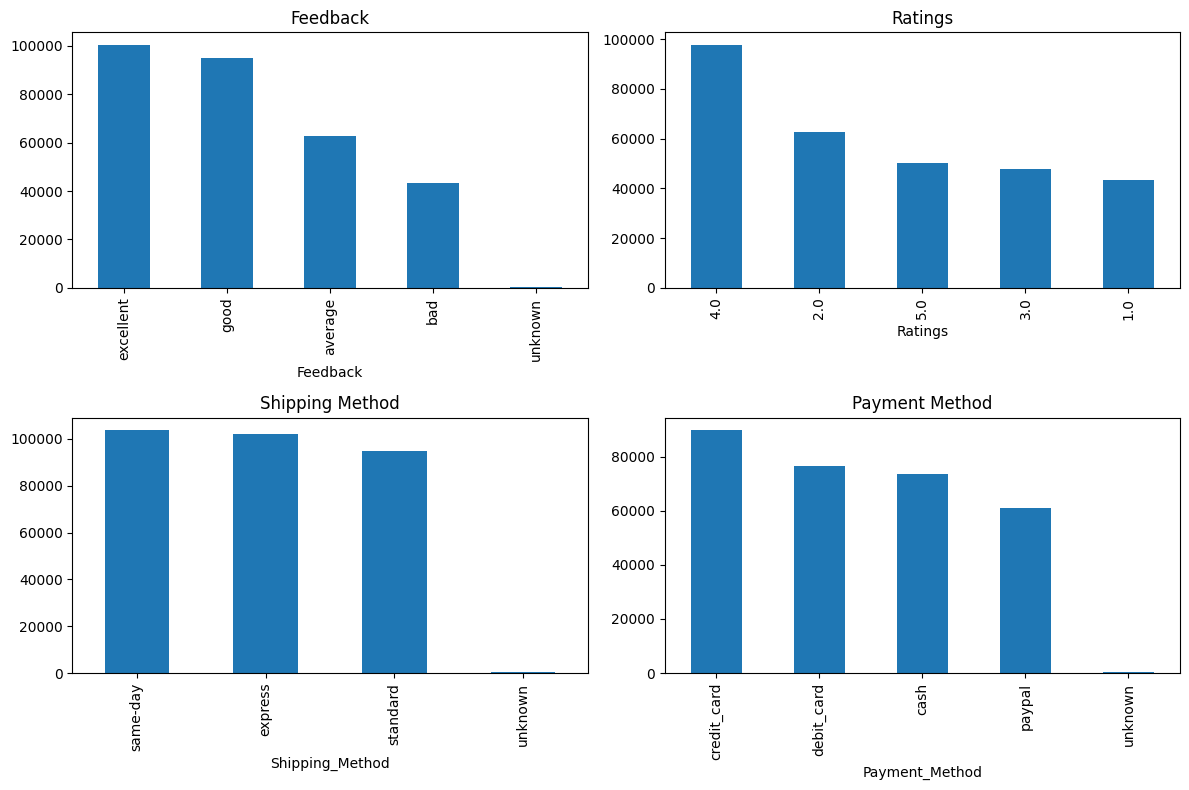

In [15]:
#Behavioral EDA
fig, axes = plt.subplots(2,2, figsize=(12,8))

df['Feedback'].value_counts().plot(kind='bar', ax=axes[0,0], title="Feedback")
df['Ratings'].value_counts().plot(kind='bar', ax=axes[0,1], title="Ratings")
df['Shipping_Method'].value_counts().plot(kind='bar', ax=axes[1,0], title="Shipping Method")
df['Payment_Method'].value_counts().plot(kind='bar', ax=axes[1,1], title="Payment Method")

plt.tight_layout()
plt.show()


# monthly sales by Product Category

In [16]:
df["YearMonth"] = df["Date"].dt.to_period("M")


In [17]:
monthly_cat = df.groupby(["YearMonth", "Product_Category"])["Total_Purchases"].sum().reset_index()

# Convert back to datetime for plotting
monthly_cat["YearMonth"] = monthly_cat["YearMonth"].astype(str)


In [18]:
monthly_cat_pivot = monthly_cat.pivot(index="YearMonth", columns="Product_Category", values="Total_Purchases")
monthly_cat_pivot = monthly_cat_pivot.fillna(0)
monthly_cat_pivot.head()


Product_Category,books,clothing,electronics,grocery,home_decor,unknown
YearMonth,,,,,,
2023-03,24871.0,24725.0,32693.0,30156.0,24998.0,139.0
2023-04,24294.0,23750.0,32147.0,28949.0,23576.0,138.0
2023-05,24621.0,25283.0,31682.0,29723.0,23550.0,186.0
2023-06,23865.0,23505.0,32065.0,29638.0,23199.0,100.0
2023-07,24315.0,24798.0,32524.0,30332.0,25148.0,88.0


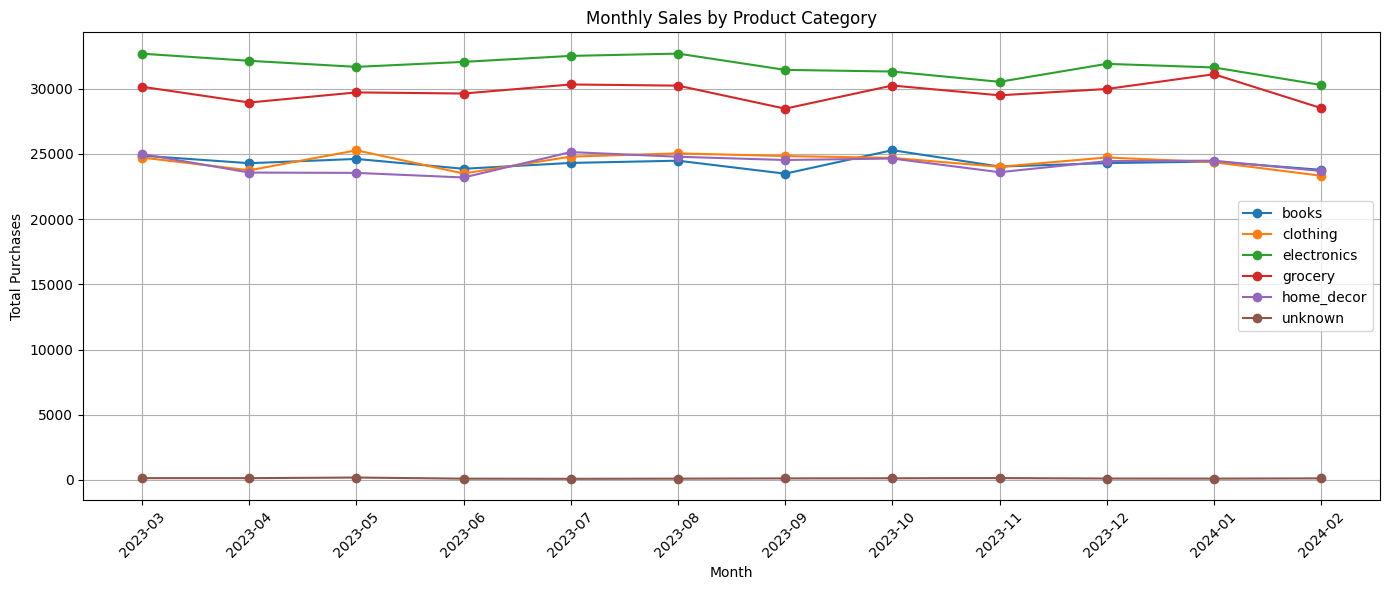

In [19]:
plt.figure(figsize=(14,6))
for col in monthly_cat_pivot.columns:
    plt.plot(monthly_cat_pivot.index, monthly_cat_pivot[col], marker="o", label=col)

plt.title("Monthly Sales by Product Category")
plt.xlabel("Month")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


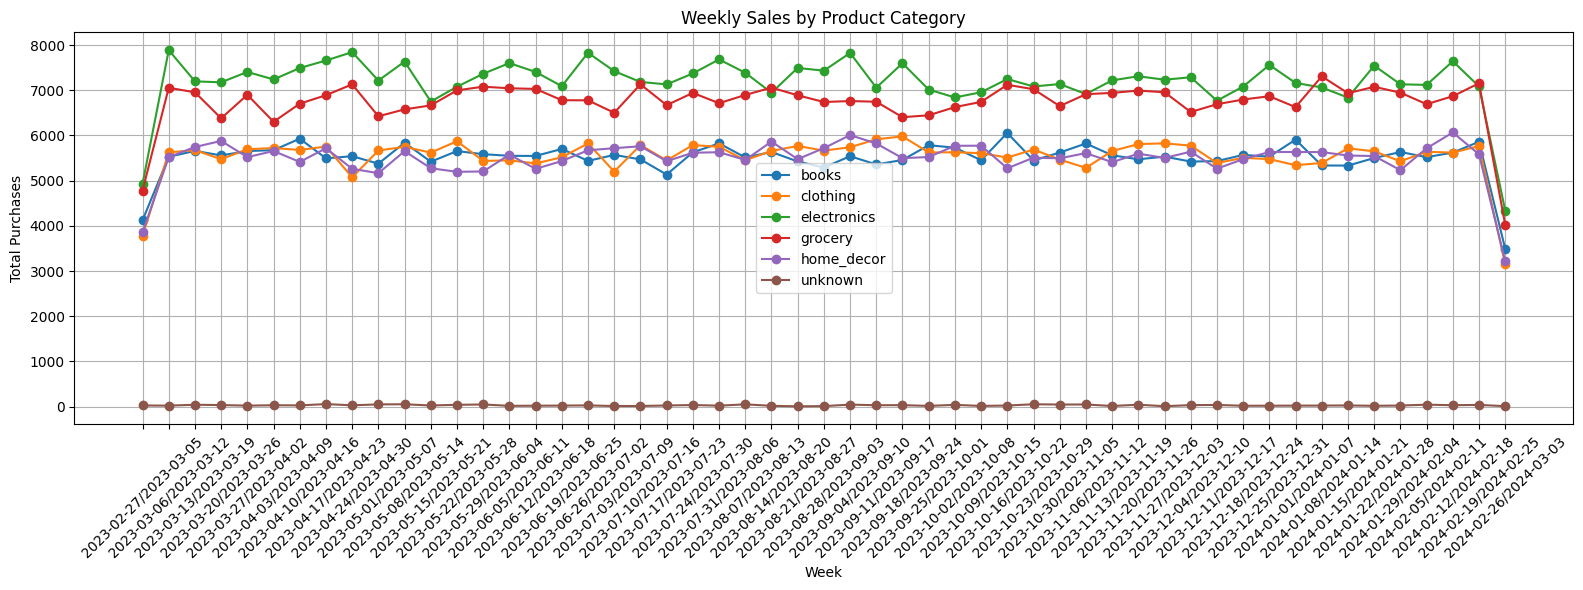

In [20]:
import matplotlib.pyplot as plt

# Create weekly period column
df["YearWeek"] = df["Date"].dt.to_period("W")

# Group by week and product category
weekly_cat = (
    df.groupby(["YearWeek", "Product_Category"])["Total_Purchases"]
      .sum()
      .reset_index()
)

# Convert period to string for plotting
weekly_cat["YearWeek"] = weekly_cat["YearWeek"].astype(str)

# Pivot for line plot
weekly_cat_pivot = weekly_cat.pivot(
    index="YearWeek",
    columns="Product_Category",
    values="Total_Purchases"
).fillna(0)

# Plot
plt.figure(figsize=(16,6))
for col in weekly_cat_pivot.columns:
    plt.plot(weekly_cat_pivot.index, weekly_cat_pivot[col], marker="o", label=col)

plt.title("Weekly Sales by Product Category")
plt.xlabel("Week")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


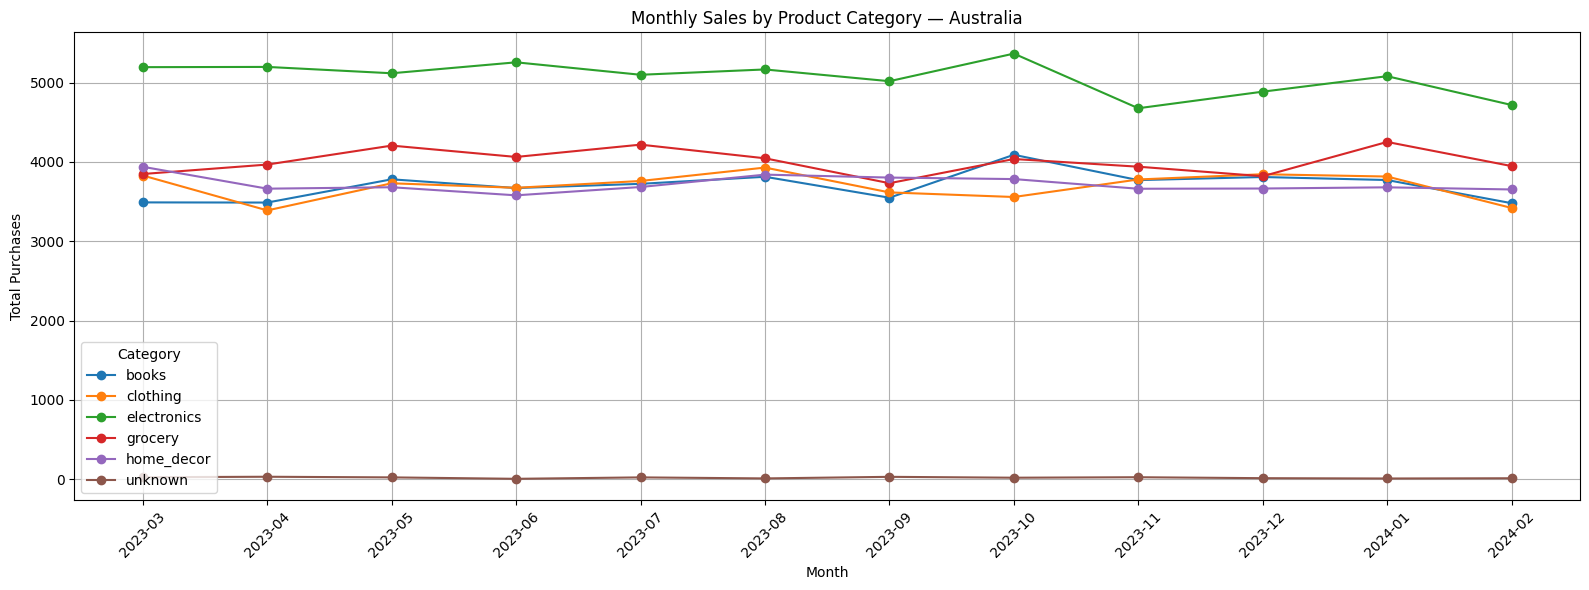

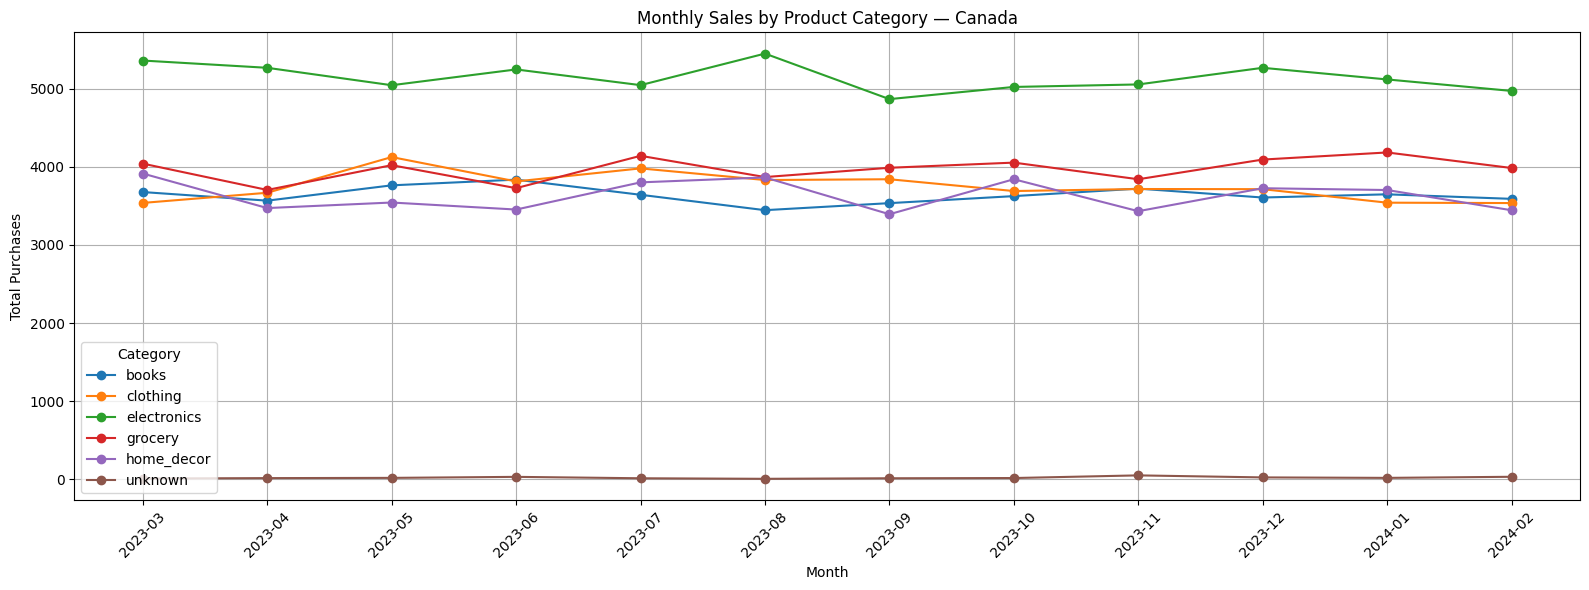

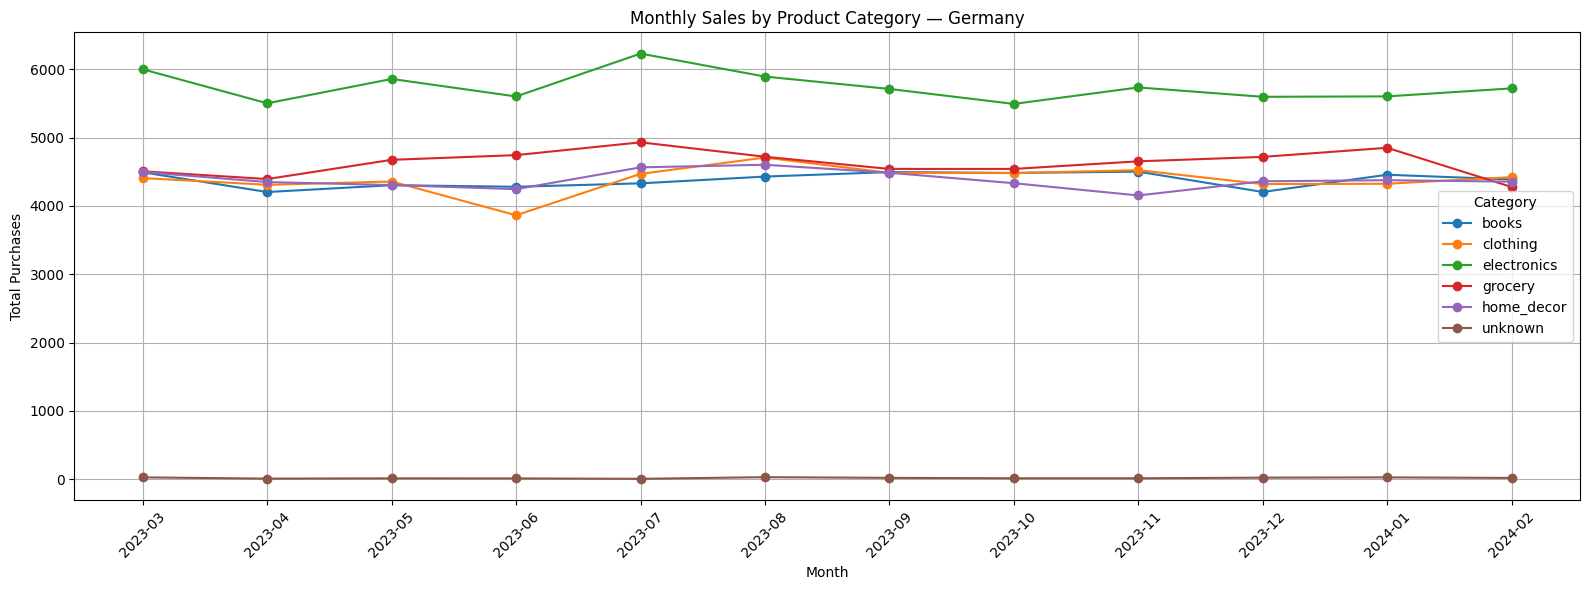

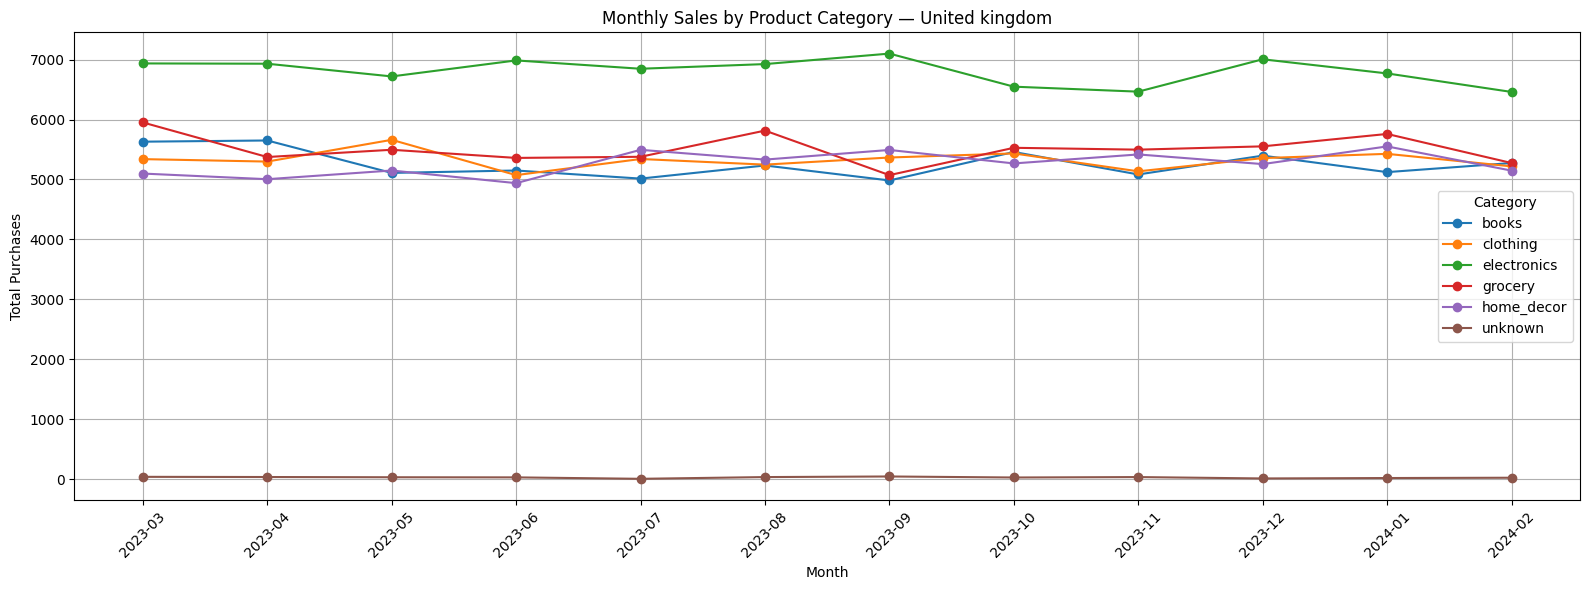

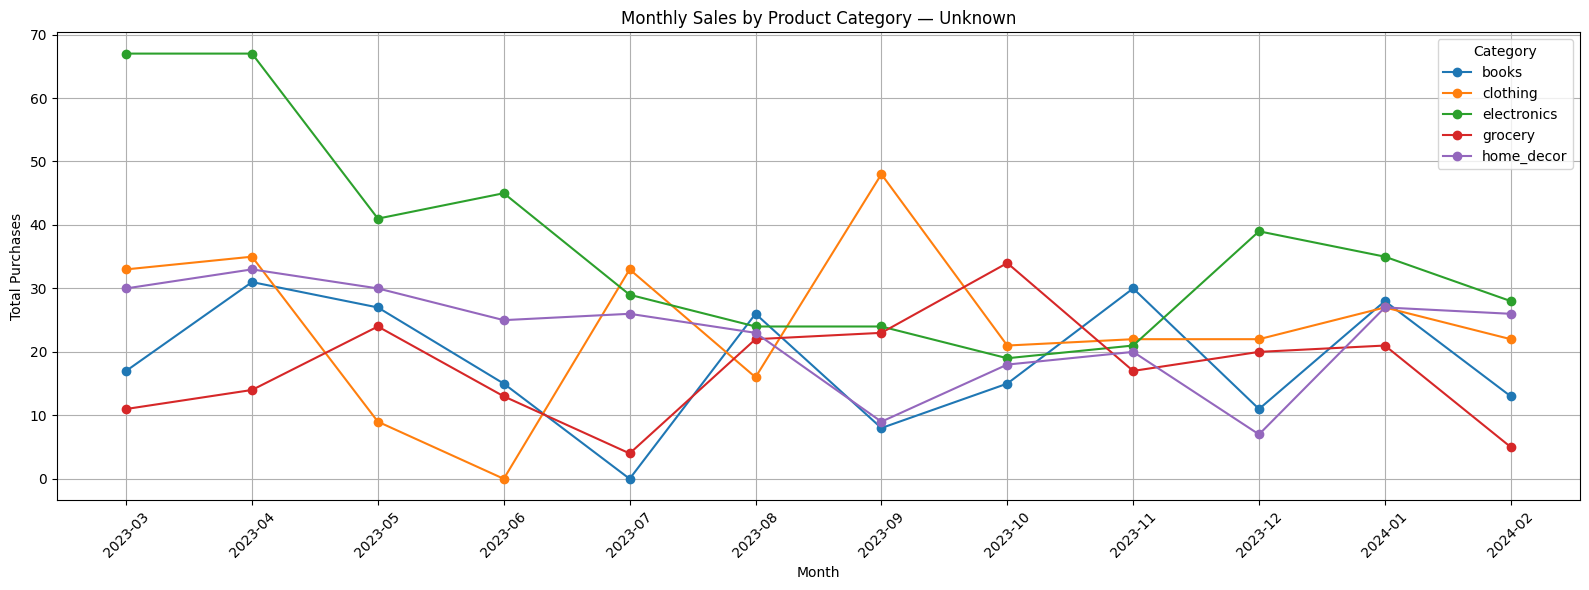

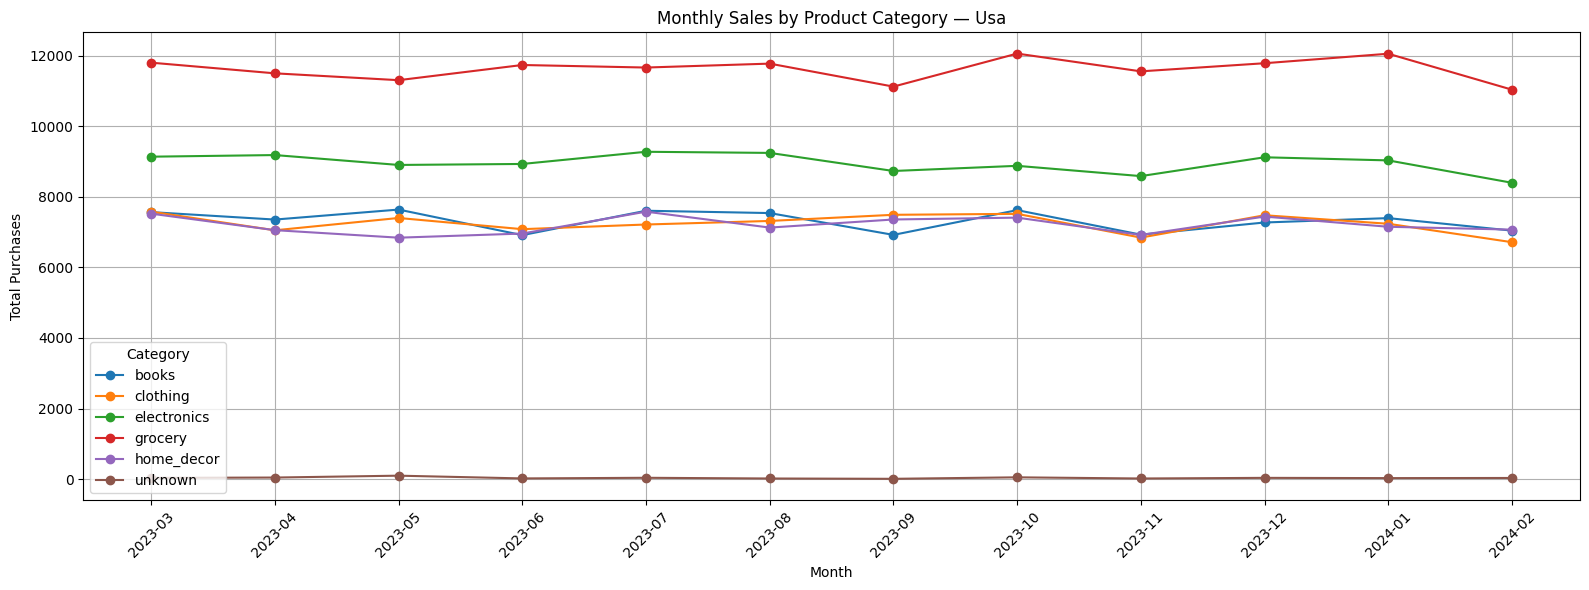

In [21]:
import matplotlib.pyplot as plt

# 1. Create Year-Month column
df["YearMonth"] = df["Date"].dt.to_period("M")

# 2. Group monthly sales by country + product category
monthly_country_cat = (
    df.groupby(["Country", "YearMonth", "Product_Category"])["Total_Purchases"]
      .sum()
      .reset_index()
)

# Convert YearMonth to string for plotting
monthly_country_cat["YearMonth"] = monthly_country_cat["YearMonth"].astype(str)

# 3. Plot monthly category trends country-wise
countries = monthly_country_cat["Country"].unique()

for country in countries:
    data = monthly_country_cat[monthly_country_cat["Country"] == country]
    
    # Pivot for line plot
    pivot_data = data.pivot(
        index="YearMonth",
        columns="Product_Category",
        values="Total_Purchases"
    ).fillna(0)

    plt.figure(figsize=(16,6))
    
    for col in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[col], marker="o", label=col)
        
    plt.title(f"Monthly Sales by Product Category — {country.capitalize()}")
    plt.xlabel("Month")
    plt.ylabel("Total Purchases")
    plt.xticks(rotation=45)
    plt.legend(title="Category")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


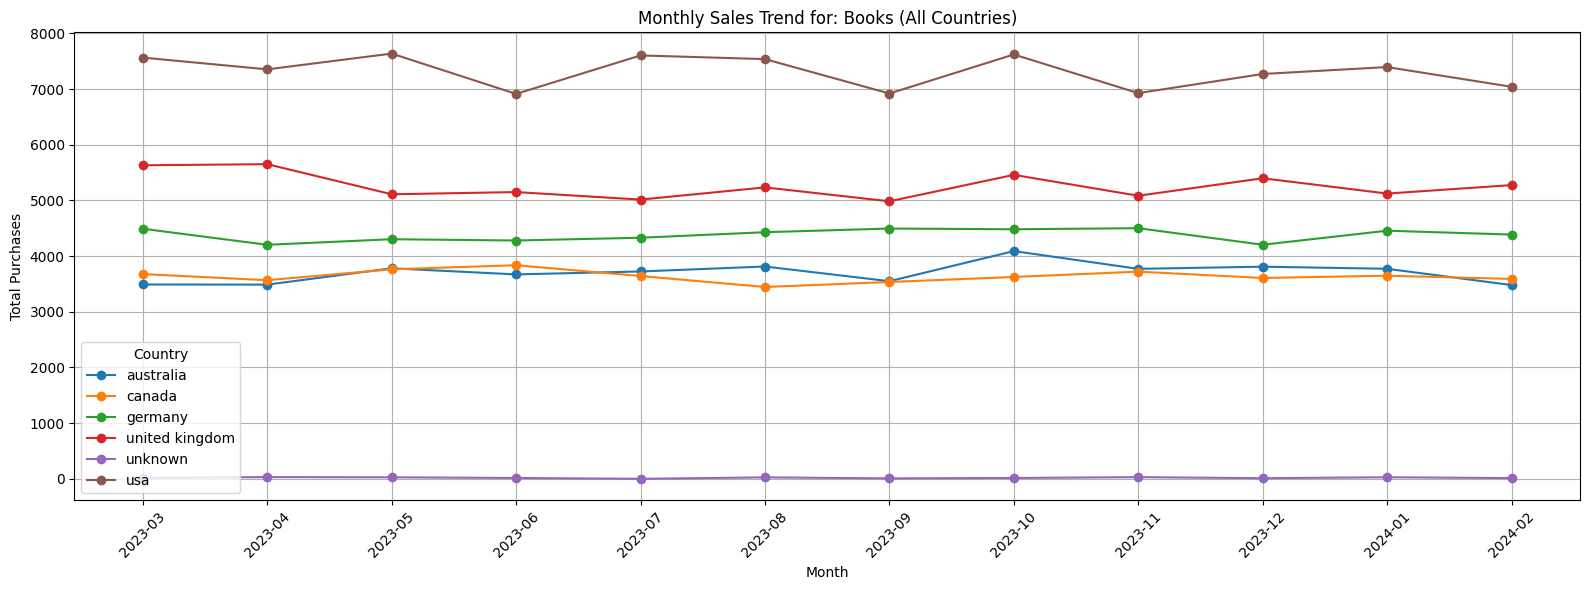

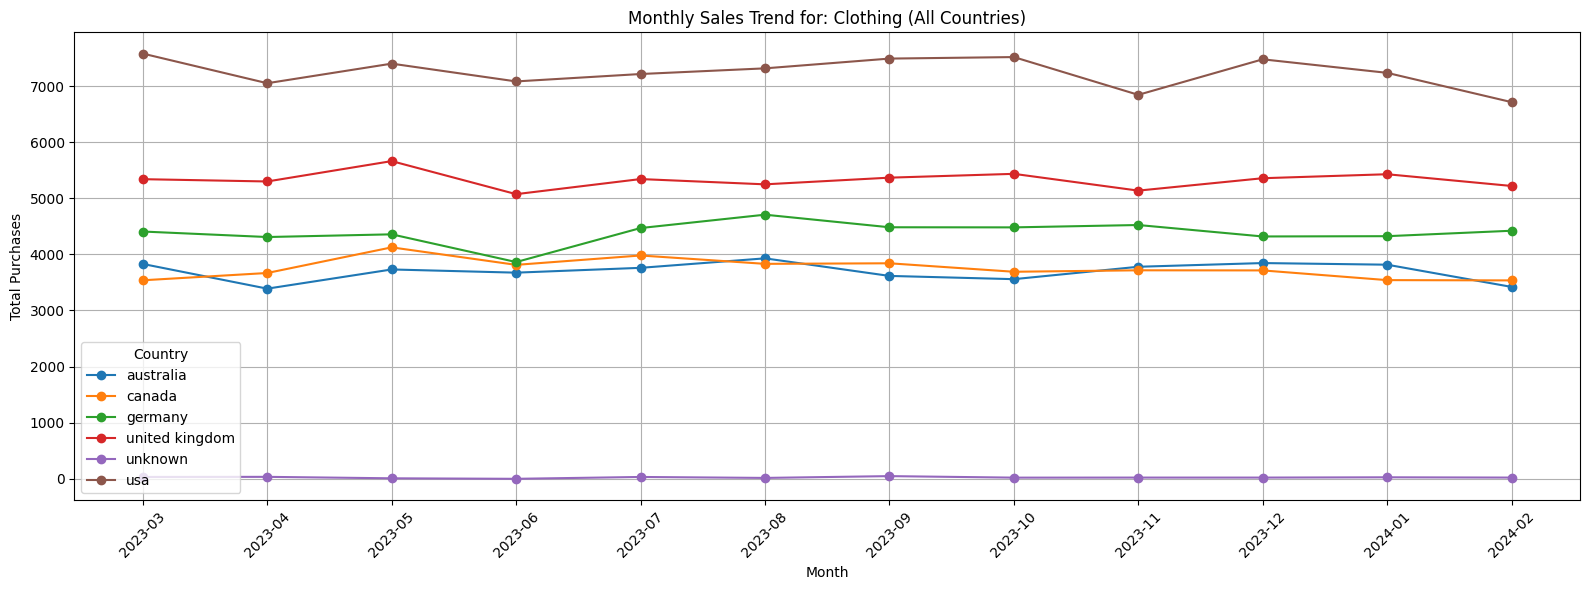

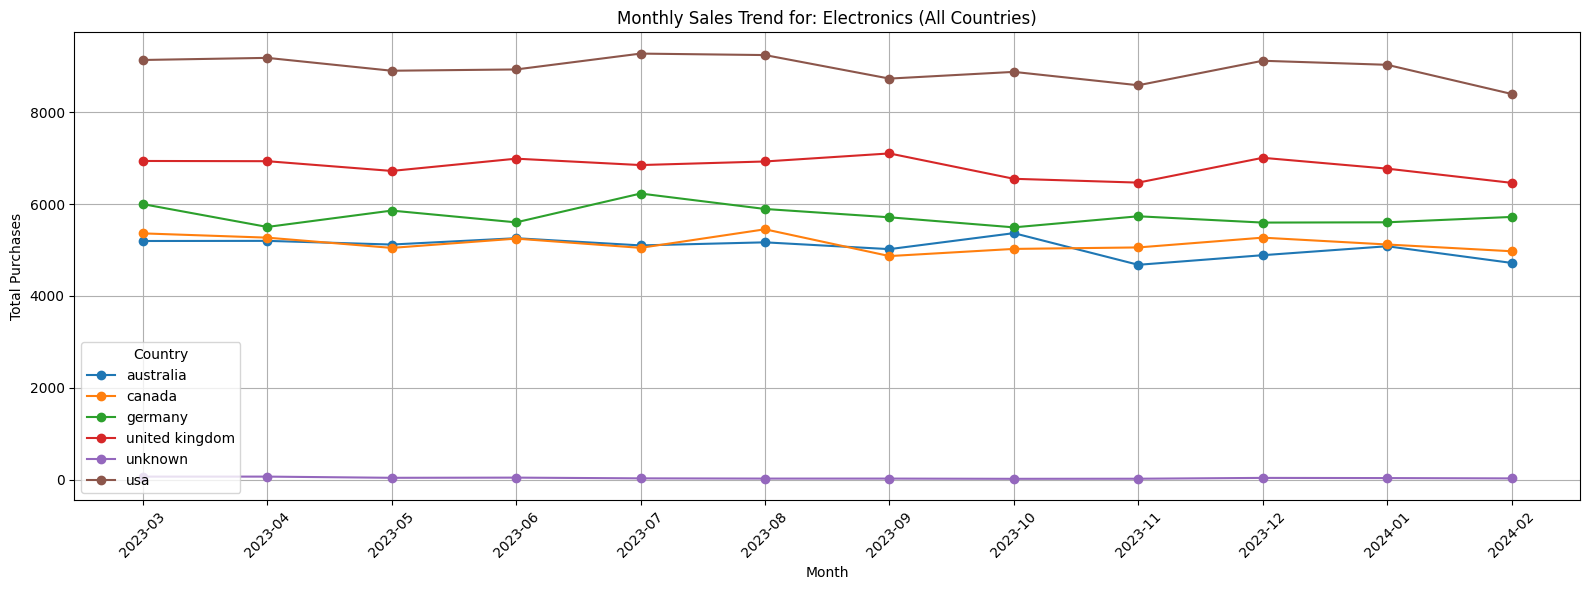

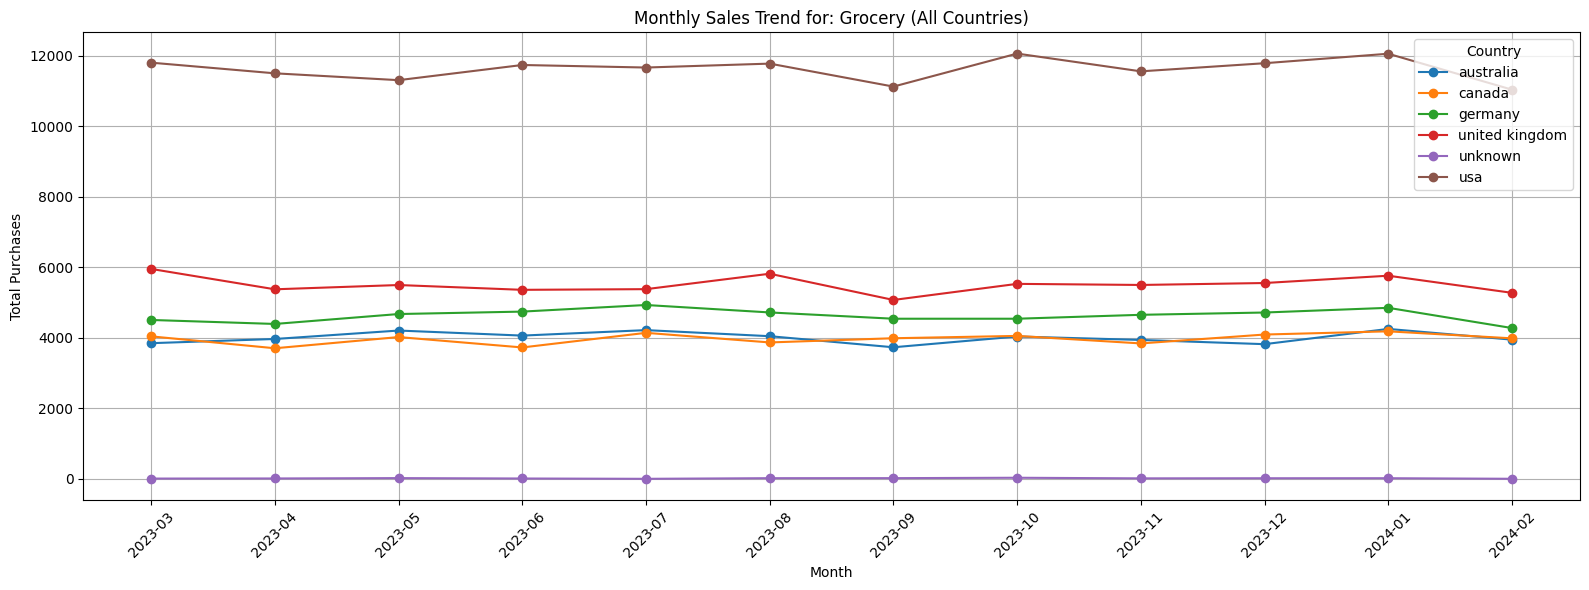

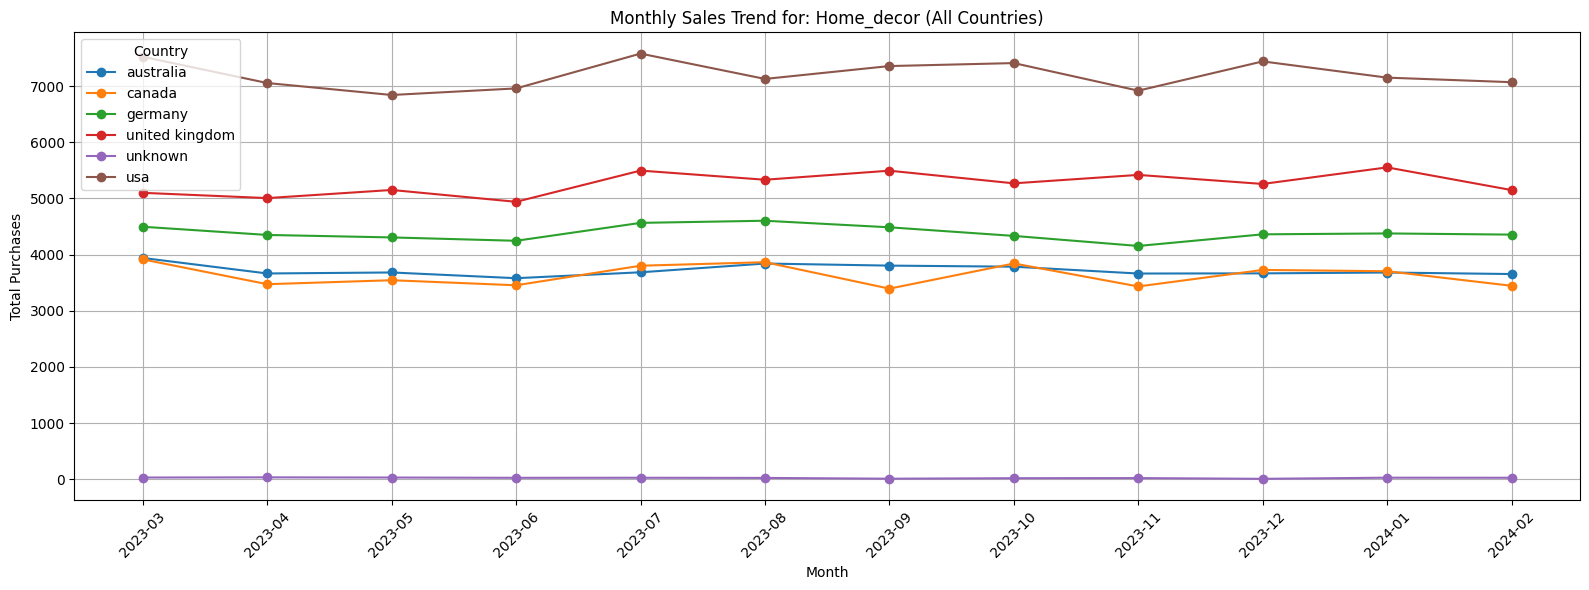

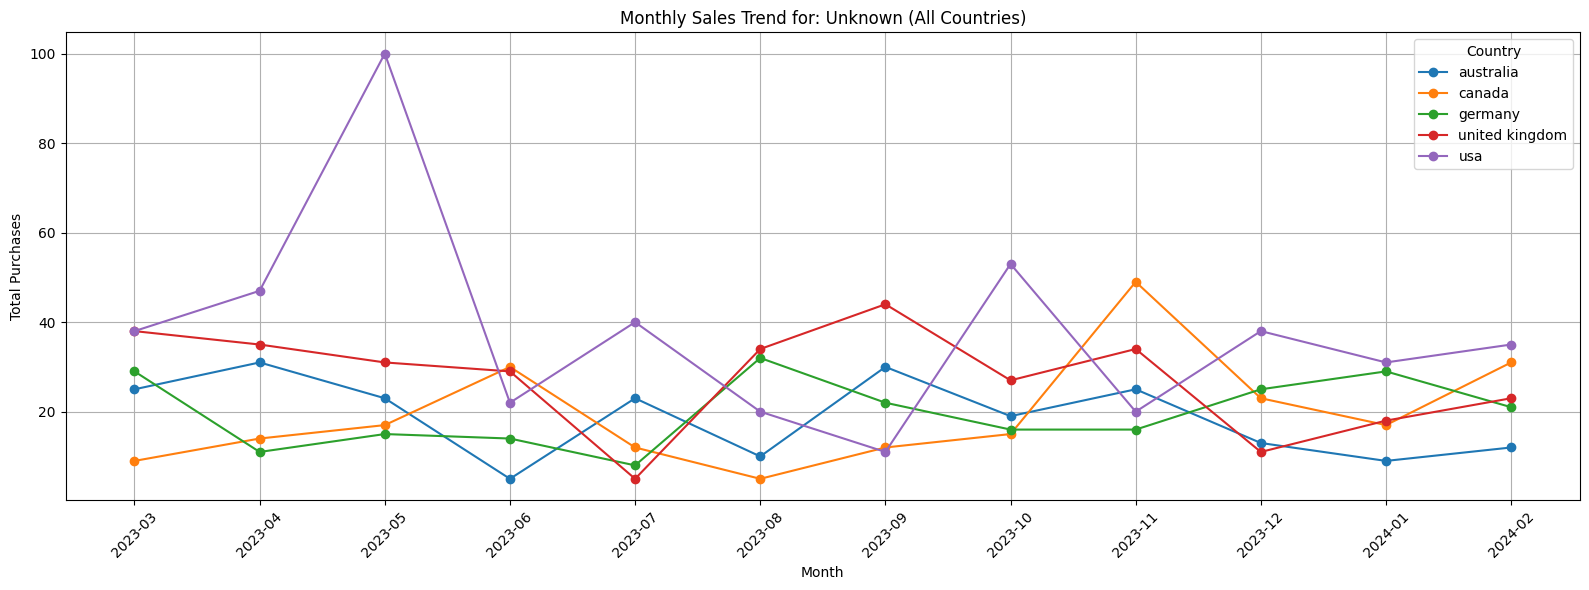

In [22]:
import matplotlib.pyplot as plt

# 1) Create Year-Month column
df["YearMonth"] = df["Date"].dt.to_period("M")

# 2) Group monthly category sales by country
monthly_cat_country = (
    df.groupby(["Product_Category", "Country", "YearMonth"])["Total_Purchases"]
      .sum()
      .reset_index()
)

# Convert YearMonth to string for better plotting
monthly_cat_country["YearMonth"] = monthly_cat_country["YearMonth"].astype(str)

# Get unique product categories
categories = monthly_cat_country["Product_Category"].unique()

# 3) Plot each product category separately
for cat in categories:
    cat_data = monthly_cat_country[monthly_cat_country["Product_Category"] == cat]
    
    plt.figure(figsize=(16,6))
    
    # Pivot: rows = Month, columns = Country
    pivot_data = cat_data.pivot(
        index="YearMonth",
        columns="Country",
        values="Total_Purchases"
    ).fillna(0)
    
    # Plot each country line
    for country in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[country], marker="o", label=country)
        
    plt.title(f"Monthly Sales Trend for: {cat.capitalize()} (All Countries)")
    plt.xlabel("Month")
    plt.ylabel("Total Purchases")
    plt.xticks(rotation=45)
    plt.legend(title="Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\kasiv\AppData\Local\Temp\ipykernel_21184\777903895.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\kasiv\AppData\Local\Temp\ipykernel_21184\777903895.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\kasiv\AppData\Local\Temp\ipykernel_21184\777903895.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


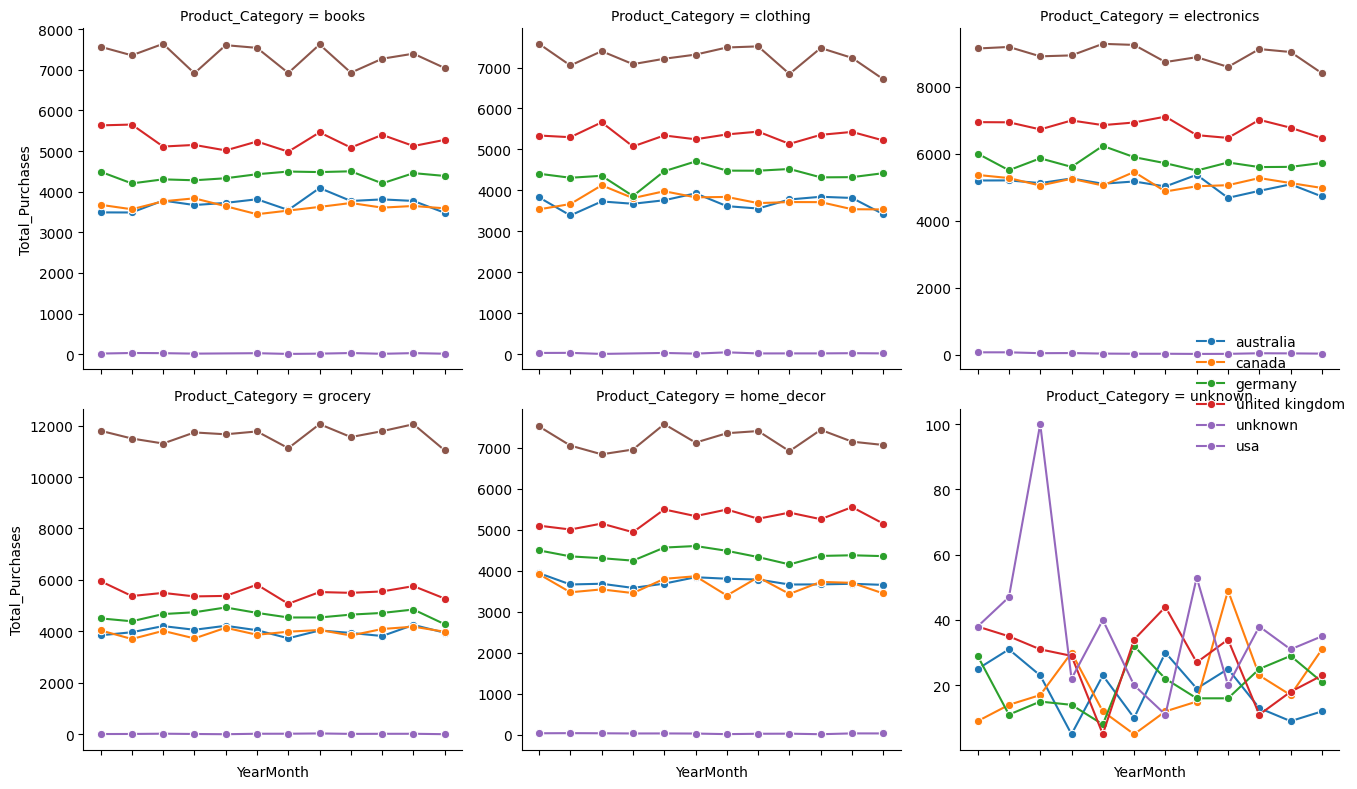

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
df["YearMonth"] = df["Date"].dt.to_period("M").astype(str)

monthly = (
    df.groupby(["YearMonth","Product_Category","Country"])["Total_Purchases"]
      .sum()
      .reset_index()
)

# Plot using FacetGrid
g = sns.FacetGrid(
    monthly, 
    col="Product_Category", 
    col_wrap=3, 
    height=4, 
    sharey=False
)

g.map_dataframe(
    sns.lineplot, 
    x="YearMonth", 
    y="Total_Purchases", 
    hue="Country", 
    marker="o"
)

g.add_legend()
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


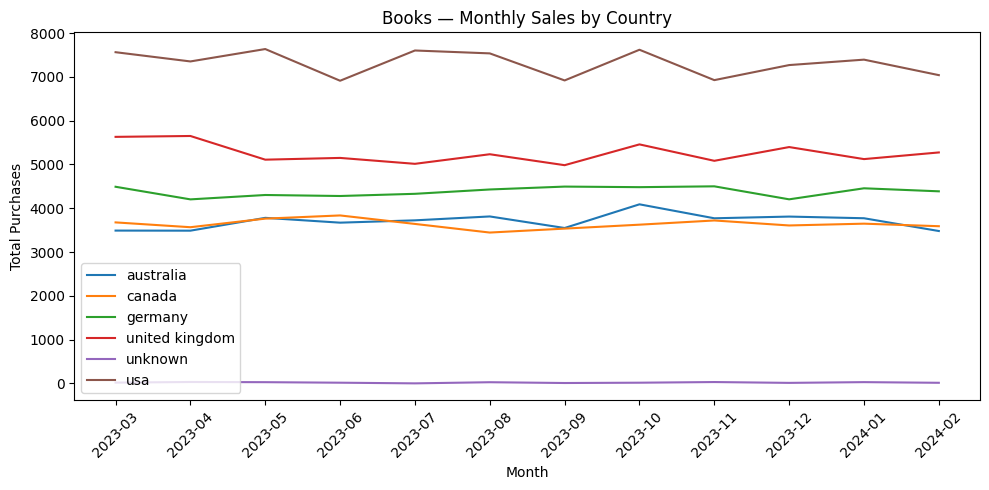

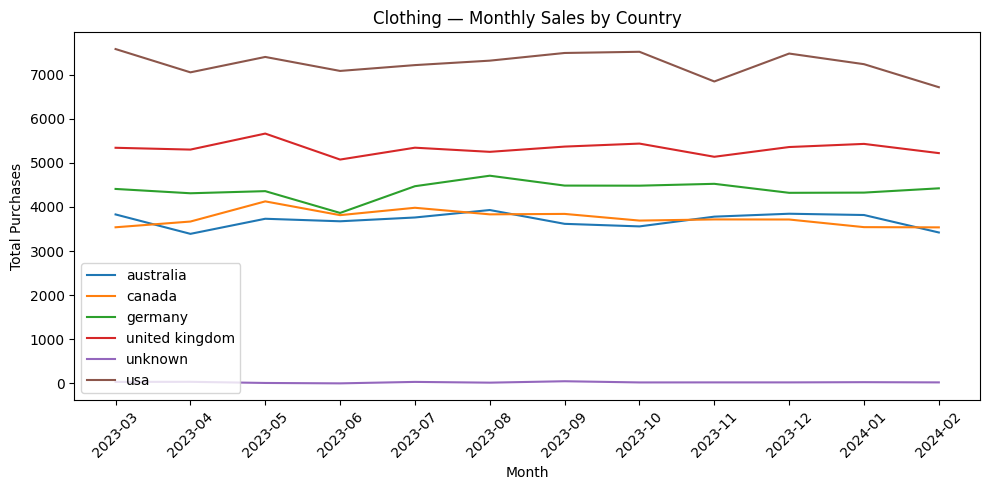

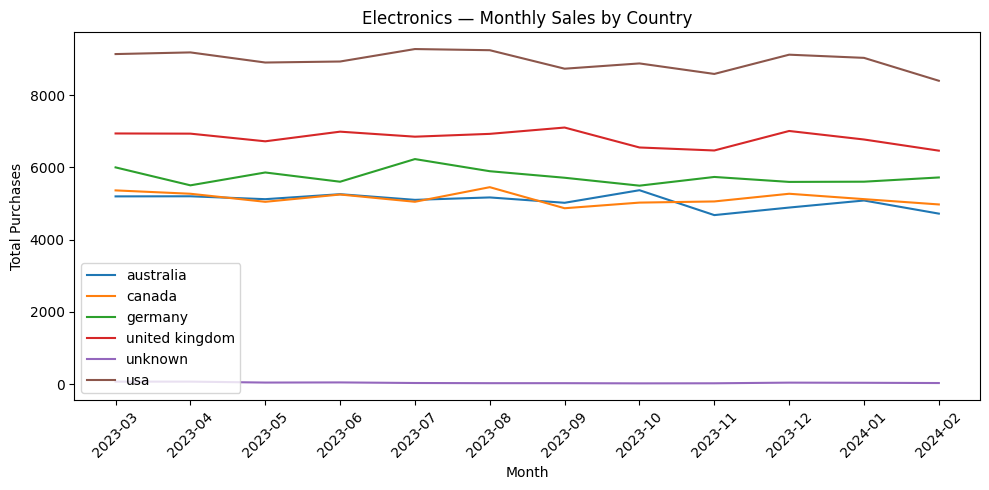

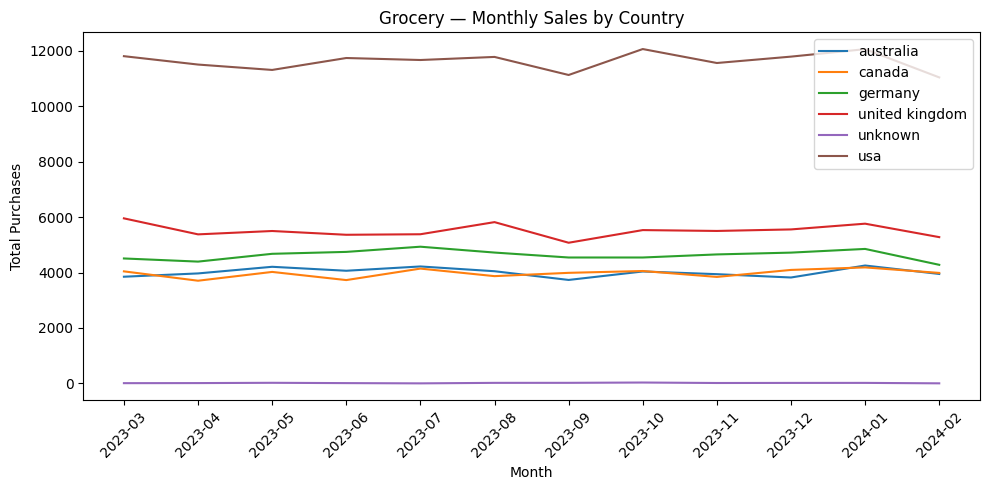

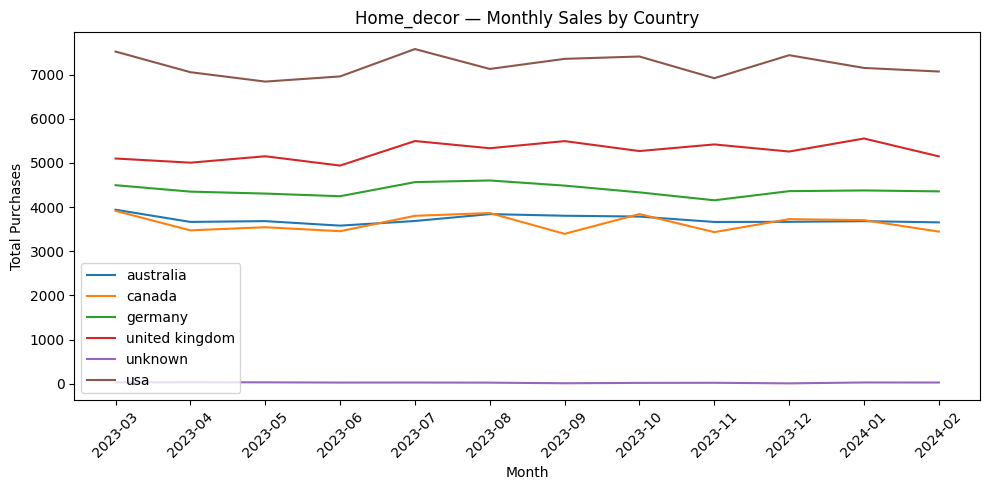

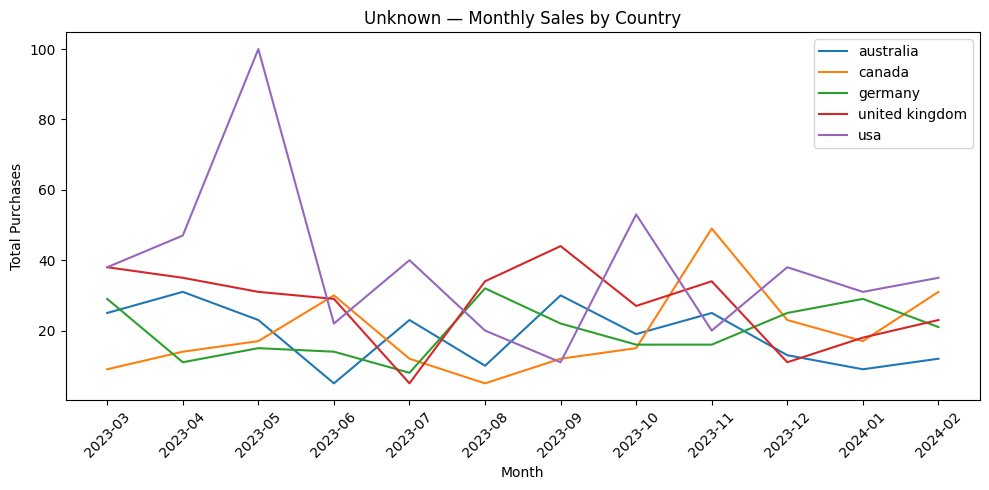

In [24]:
import matplotlib.pyplot as plt

# Create YearMonth column
df["YearMonth"] = df["Date"].dt.to_period("M").astype(str)

# Group monthly category sales by country
monthly = (
    df.groupby(["YearMonth","Product_Category","Country"])["Total_Purchases"]
      .sum()
      .reset_index()
)

# Unique product categories
categories = monthly["Product_Category"].unique()

# Loop through each category and plot in your simple style
for cat in categories:
    cat_data = monthly[monthly["Product_Category"] == cat]
    
    # Pivot to: rows = months, columns = country
    pivot_data = cat_data.pivot(
        index="YearMonth",
        columns="Country",
        values="Total_Purchases"
    ).fillna(0)
    
    plt.figure(figsize=(10,5))
    
    # Simple line plot for each country
    for country in pivot_data.columns:
        plt.plot(
            pivot_data.index,
            pivot_data[country],
            label=country
        )
    
    plt.title(f"{cat.capitalize()} — Monthly Sales by Country")
    plt.xlabel("Month")
    plt.ylabel("Total Purchases")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
